#  Data Scientist Forecasting Assignment

#### Aim: To predict the prices of stainless-steel (Column B: StainlessSteelPrice)
#### Time Period: 3 months and 6 months
#### Tasks:
1. Conduct exploratory data analysis and report the insights 

2. Forecast the prices of stainless-steel for the given time period(s) using the following methods:
    
    Statistical Models (at least one type)
    
    Machine Learning (at least one type)
    
    Deep Learning (at least one type)
    
    o Select the features - Column C (Steel_Inventory_M_USD) through column T (Copper_Global_USD) – that help to improve the accuracy

    o You have the complete freedom to do any kind of models that you feel comfortable to deliver this task

3. Provide insights on how your model made the prediction

4. Use the following evaluation criteria for model selection

    o Mean Absolute Percentage Error (MAPE)
    
    o Directional Symmetry(kendall's Tau):
    Kendall’s Tau is a non-parametric measure of relationships between columns of ranked data. The Tau correlation coefficient returns a value of 0 to 1, where:0 is no relationship,1 is a perfect relationship.

#### Acronym
- BCI: Business Confidence Index:It refers to the basic estimate of the economic situation made by the enterprise
- CLI: Composite Leading Indicator:It is mainly used to judge the overall short-term economic boom because it appears first before macroeconomic fluctuations reach their peaks or troughs, and thus can be used to judge whether and to what extent there are unstable factors in economic operation, and to provide early warning and monitoring.
- PMI: Purchasing Managers Index:exploratory data analysis¶


##### The following analysis is also necessary, but it is not required and lack of reliable source of data, so it will not be carried out.
1. Global consumption of stainless steel production
2. Porter's five forces model analysis of the stainless steel industry environment 
3. Analysis of industrial chain model


##  Exploratory data analysis

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn import preprocessing
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
#Read Data
import os
os.getcwd()
os.listdir(os.getcwd())#get the file name 

['Capstone Project - The Battle of Neighborhoods (Week 2).ipynb',
 'data science aufgabe.ipynb',
 'labs_FinalModule_Coursera_House_Sales_in_King_Count_USA.ipynb',
 '.ipynb_checkpoints',
 'Stainless-Steel-Prices-Forecasty-Assignment.csv',
 'Data Scientist Forecasting Assignment.ipynb',
 'Data science -forea Ai.ipynb']

In [4]:
#load data again ,and named df
df= pd.read_csv('Stainless-Steel-Prices-Forecasty-Assignment.csv')
#df.dtypes #checke the type of each col df:stainless steel price
df['Date'] = pd.to_datetime(df['Date']) #Transfer to date
df['Steel_Inventory_M_USD']=df['Steel_Inventory_M_USD'].astype('float64')
df['Steel_Orders_M_USD']=df['Steel_Orders_M_USD'].astype('float64')
df['Baltic_Dry_Index']=df['Baltic_Dry_Index'].astype('float64')
data = df.drop(['Date'], axis=1)
data.index = df.Date
stain_steel_prise=data
#df check data
#df.dtypes #checke the type of each col

stain_steel_prise.dtypes #checke the type of each col

StainlessSteelPrice         float64
Steel_Inventory_M_USD       float64
Steel_Orders_M_USD          float64
IronOre_Global_USD          float64
CoalAustralia_Global_USD    float64
Energy_Index                float64
Nickel_Global_USD           float64
Zinc_Global_USD             float64
Freight_Transport_Index     float64
WTI_Crude_Global_USD        float64
Baltic_Dry_Index            float64
BCI_China                   float64
BCI_Europe                  float64
BCI_US                      float64
CLI_China                   float64
CLI_Europe                  float64
CLI_US                      float64
PMI_US_Manufacturing        float64
Copper_Global_USD           float64
dtype: object

In [5]:
stain_steel_prise

,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
Date,,,,,,,,,,,,,,,,,,,
2013-07-01,0.827352,20575.0,10568.0,127.191304,82.222360,227.022942,13750.31522,1837.619565,-0.4,104.545217,1062.0,98.80018,99.64265,100.10440,101.14230,99.43615,100.62300,50.9,6906.64
2013-08-01,0.760221,20609.0,10821.0,137.055000,82.221429,232.234194,14308.26190,1896.392857,0.5,106.546364,1132.0,99.04874,99.91766,100.39620,101.19380,99.64082,100.65450,55.4,7186.25
2013-09-01,0.784715,20761.0,10774.0,134.185714,83.295918,234.335594,13801.39286,1846.880952,0.1,106.313810,2003.0,99.27196,100.18490,100.53630,101.20660,99.84383,100.66460,55.7,7159.27
2013-10-01,0.769293,20735.0,11291.0,132.572727,85.443634,229.393932,14117.65217,1884.836957,-0.1,100.500435,1504.0,99.40488,100.36330,100.57710,101.18350,100.02300,100.66660,56.2,7203.02
2013-11-01,0.750242,20854.0,11559.0,136.323810,88.363265,225.437049,13684.01190,1866.416667,2.1,93.812381,1821.0,99.36221,100.49830,100.54590,101.12830,100.17150,100.67440,56.4,7070.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,0.893123,19753.0,9914.0,87.625000,71.050179,110.312331,12715.55000,2113.237500,-0.6,50.601500,535.0,94.50153,99.15099,98.99674,85.38329,99.33393,99.23477,50.9,5687.75
2020-03-01,0.829167,19945.0,9072.0,88.659091,70.204870,73.684533,11846.22727,1903.625000,-0.6,29.877273,626.0,96.55129,97.81904,98.56776,92.34856,96.87456,97.54372,50.1,5182.63
2020-04-01,0.789704,19824.0,7800.0,83.750000,64.620000,52.771306,11804.00950,1903.367000,-7.1,16.807273,635.0,98.21212,96.24888,98.10213,95.14948,90.34396,92.28025,49.1,5057.97


In [6]:
df=stain_steel_prise
df

,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
Date,,,,,,,,,,,,,,,,,,,
2013-07-01,0.827352,20575.0,10568.0,127.191304,82.222360,227.022942,13750.31522,1837.619565,-0.4,104.545217,1062.0,98.80018,99.64265,100.10440,101.14230,99.43615,100.62300,50.9,6906.64
2013-08-01,0.760221,20609.0,10821.0,137.055000,82.221429,232.234194,14308.26190,1896.392857,0.5,106.546364,1132.0,99.04874,99.91766,100.39620,101.19380,99.64082,100.65450,55.4,7186.25
2013-09-01,0.784715,20761.0,10774.0,134.185714,83.295918,234.335594,13801.39286,1846.880952,0.1,106.313810,2003.0,99.27196,100.18490,100.53630,101.20660,99.84383,100.66460,55.7,7159.27
2013-10-01,0.769293,20735.0,11291.0,132.572727,85.443634,229.393932,14117.65217,1884.836957,-0.1,100.500435,1504.0,99.40488,100.36330,100.57710,101.18350,100.02300,100.66660,56.2,7203.02
2013-11-01,0.750242,20854.0,11559.0,136.323810,88.363265,225.437049,13684.01190,1866.416667,2.1,93.812381,1821.0,99.36221,100.49830,100.54590,101.12830,100.17150,100.67440,56.4,7070.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,0.893123,19753.0,9914.0,87.625000,71.050179,110.312331,12715.55000,2113.237500,-0.6,50.601500,535.0,94.50153,99.15099,98.99674,85.38329,99.33393,99.23477,50.9,5687.75
2020-03-01,0.829167,19945.0,9072.0,88.659091,70.204870,73.684533,11846.22727,1903.625000,-0.6,29.877273,626.0,96.55129,97.81904,98.56776,92.34856,96.87456,97.54372,50.1,5182.63
2020-04-01,0.789704,19824.0,7800.0,83.750000,64.620000,52.771306,11804.00950,1903.367000,-7.1,16.807273,635.0,98.21212,96.24888,98.10213,95.14948,90.34396,92.28025,49.1,5057.97


In [7]:
stain_steel_prise.shape

(84, 19)

### Note 
##### Baltic_Dry_Index  ( correct name as BDI)
It measures the demand for shipping capacity versus the supply of dry bulk carriers. 
The demand for shipping varies with the amount of cargo that is being traded or moved in various markets (supply and demand).
#### what would be needed for stainless steel
Production process
Most of the world's stainless steel production is produced by the following processes:

Electric arc furnace (EAF): stainless steel scrap, other ferrous scrap, and ferrous alloys (Fe Cr, Fe Ni, Fe Mo, Fe Si) are melted together. The molten metal is then poured into a ladle and transferred into the AOD process (see below).


In [8]:
stain_steel_prise.describe()

,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.810715,20070.559524,9831.595238,79.962940,81.844151,143.408951,12712.275477,2358.786301,0.122619,61.017507,1067.785714,98.710869,100.569427,100.175521,99.563679,100.023602,99.814380,54.026190,6037.075714
std,0.143444,1764.033210,1240.333905,23.874776,19.443360,47.136073,2694.729168,470.463900,1.230080,21.407539,443.697935,0.848983,1.123901,0.876723,2.027340,1.567463,1.367807,4.097578,783.645475
min,0.499859,16688.000000,7650.000000,40.882609,53.428929,52.771306,8298.500000,1520.362500,-7.100000,16.807273,317.000000,94.501530,95.996640,98.102130,85.383290,90.343960,92.280250,41.500000,4471.790000
25%,0.743778,18980.000000,8904.000000,61.484190,67.111352,111.607197,10578.975000,2021.262099,-0.425000,47.738636,699.500000,98.271312,100.427200,99.535878,99.225065,99.696710,99.278723,51.275000,5645.152500
50%,0.812157,20190.000000,9947.000000,74.280682,78.677679,131.088857,12721.351135,2287.054725,0.250000,54.912545,1058.500000,98.675055,100.562400,100.312350,99.854750,100.294100,100.030800,54.250000,6024.555000
75%,0.893690,21458.500000,11062.500000,92.409524,96.985695,163.923895,14105.350543,2658.296875,0.725000,68.464674,1354.500000,99.364373,101.040100,100.803675,100.518350,100.500175,100.679550,57.400000,6801.285000
max,1.075014,23464.000000,11825.000000,137.055000,125.085877,237.208789,19401.075000,3532.900000,2.100000,106.546364,2378.000000,99.923670,102.323700,101.573800,101.206600,101.709300,100.968000,60.800000,7291.470000


From above table ,Normalize is necessary .


In [9]:
stain_steel_prise.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2013-07-01 to 2020-06-01
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   StainlessSteelPrice       84 non-null     float64
 1   Steel_Inventory_M_USD     84 non-null     float64
 2   Steel_Orders_M_USD        84 non-null     float64
 3   IronOre_Global_USD        84 non-null     float64
 4   CoalAustralia_Global_USD  84 non-null     float64
 5   Energy_Index              84 non-null     float64
 6   Nickel_Global_USD         84 non-null     float64
 7   Zinc_Global_USD           84 non-null     float64
 8   Freight_Transport_Index   84 non-null     float64
 9   WTI_Crude_Global_USD      84 non-null     float64
 10  Baltic_Dry_Index          84 non-null     float64
 11  BCI_China                 84 non-null     float64
 12  BCI_Europe                84 non-null     float64
 13  BCI_US                    84 non-null     float

#### source
####  check at the end ob the model lack important features
https://en.wikipedia.org/wiki/Stainless_steel

Production process
Most of the world's stainless steel production is produced by the following processes:

Electric arc furnace (EAF): stainless steel scrap, other ferrous scrap, and ferrous alloys (Fe Cr, Fe Ni, Fe Mo, Fe Si) are melted together. The molten metal is then poured into a ladle and transferred into the AOD process .



In [10]:
#find all missing value
stain_steel_prise.isnull().any()

StainlessSteelPrice         False
Steel_Inventory_M_USD       False
Steel_Orders_M_USD          False
IronOre_Global_USD          False
CoalAustralia_Global_USD    False
Energy_Index                False
Nickel_Global_USD           False
Zinc_Global_USD             False
Freight_Transport_Index     False
WTI_Crude_Global_USD        False
Baltic_Dry_Index            False
BCI_China                   False
BCI_Europe                  False
BCI_US                      False
CLI_China                   False
CLI_Europe                  False
CLI_US                      False
PMI_US_Manufacturing        False
Copper_Global_USD           False
dtype: bool

#### check: There is no missing value in the data
### visualization

No handles with labels found to put in legend.


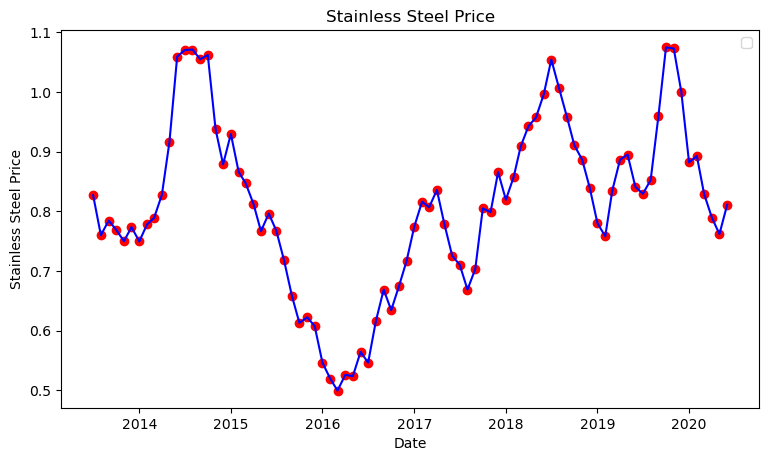

In [11]:
### plot population of each factor
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Stainless Steel Price')

plt.scatter(stain_steel_prise.index, stain_steel_prise['StainlessSteelPrice'], color="r")
plt.plot(stain_steel_prise.index, stain_steel_prise['StainlessSteelPrice'], color="b")
plt.xlabel('Date')
plt.ylabel('Stainless Steel Price')

plt.legend()
plt.show()

In [12]:
# distribution check
from scipy import stats

u = stain_steel_prise['StainlessSteelPrice'].mean()  
std = stain_steel_prise['StainlessSteelPrice'].std() 
stats.kstest(stain_steel_prise['StainlessSteelPrice'], 'norm', (u, std))


KstestResult(statistic=0.08551113458426884, pvalue=0.5422392313895847)

#### result:
KstestResult(statistic=0.08551113458426896, pvalue=0.542239231389583)

p>0.05

Stainless Steel Price is normal distributed 


### Pre processing 

In [13]:
stain_steel_prise.columns.values.tolist()

['StainlessSteelPrice',
 'Steel_Inventory_M_USD',
 'Steel_Orders_M_USD',
 'IronOre_Global_USD',
 'CoalAustralia_Global_USD',
 'Energy_Index',
 'Nickel_Global_USD',
 'Zinc_Global_USD',
 'Freight_Transport_Index',
 'WTI_Crude_Global_USD',
 'Baltic_Dry_Index',
 'BCI_China',
 'BCI_Europe',
 'BCI_US',
 'CLI_China',
 'CLI_Europe',
 'CLI_US',
 'PMI_US_Manufacturing',
 'Copper_Global_USD ']

In [14]:
stain_steel_prise.shape

(84, 19)

In [15]:
#Creating train and test dataset

X = stain_steel_prise.iloc[:,1:19]
y = stain_steel_prise[['StainlessSteelPrice']]
x_train=X.iloc[0:67,:]
x_test =X.iloc[67:84,:]
y_train=y.iloc[0:67,:]
y_test =y.iloc[67:84,:]
print ('Train set:', x_train.shape)
print ('Test set:', x_test.shape)

Train set: (67, 18)
Test set: (17, 18)


In [16]:
x_train#check data

,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
Date,,,,,,,,,,,,,,,,,,
2013-07-01,20575.0,10568.0,127.191304,82.222360,227.022942,13750.31522,1837.619565,-0.4,104.545217,1062.0,98.80018,99.64265,100.1044,101.14230,99.43615,100.62300,50.9,6906.64
2013-08-01,20609.0,10821.0,137.055000,82.221429,232.234194,14308.26190,1896.392857,0.5,106.546364,1132.0,99.04874,99.91766,100.3962,101.19380,99.64082,100.65450,55.4,7186.25
2013-09-01,20761.0,10774.0,134.185714,83.295918,234.335594,13801.39286,1846.880952,0.1,106.313810,2003.0,99.27196,100.18490,100.5363,101.20660,99.84383,100.66460,55.7,7159.27
2013-10-01,20735.0,11291.0,132.572727,85.443634,229.393932,14117.65217,1884.836957,-0.1,100.500435,1504.0,99.40488,100.36330,100.5771,101.18350,100.02300,100.66660,56.2,7203.02
2013-11-01,20854.0,11559.0,136.323810,88.363265,225.437049,13684.01190,1866.416667,2.1,93.812381,1821.0,99.36221,100.49830,100.5459,101.12830,100.17150,100.67440,56.4,7070.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-01,21343.0,11443.0,68.800000,122.229107,174.087747,12510.35000,2434.675000,1.3,70.185500,1540.0,98.97620,101.19890,101.4821,99.15414,100.04860,100.68510,60.8,6050.76
2018-10-01,21397.0,11178.0,72.021739,114.762112,173.770685,12314.91304,2673.673913,0.4,70.751304,1490.0,98.62154,101.02360,101.2647,99.11140,99.85416,100.50550,59.5,6219.59
2018-11-01,21747.0,11229.0,72.295455,107.552922,149.336356,11239.71591,2595.693182,0.4,56.567727,1231.0,98.30930,100.96900,101.0420,99.10076,99.71534,100.29330,57.7,6195.92


In [17]:
#Standardization 
#due to different unit and
#There are huge numerical differences between different features and price

# Normalize time series data :y = (x - mean) / standard_deviation

from sklearn.preprocessing import StandardScaler
from math import sqrt

ssprice_std=stain_steel_prise
for i in range(1,18) :
    scaler = StandardScaler()
    ssprice_std.iloc[:,[i]] = scaler.fit_transform(stain_steel_prise.iloc[:,[i]] )

ssprice_std #stain_steel_prise after normalize
###
#inversed
## scaler.inverse_transform(normalized)

,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
Date,,,,,,,,,,,,,,,,,,,
2013-07-01,0.827352,0.287676,0.597281,1.990051,0.019569,1.784539,0.387525,-1.114425,-0.427418,2.045501,-0.013118,0.105829,-0.829560,-0.081609,0.783343,-0.377030,0.594730,-0.767518,6906.64
2013-08-01,0.760221,0.307066,0.802483,2.405675,0.019520,1.895761,0.595819,-0.988749,0.308636,2.139541,0.145594,0.400361,-0.583398,0.253221,0.808898,-0.245672,0.617898,0.337287,7186.25
2013-09-01,0.784715,0.393750,0.764363,2.284773,0.075115,1.940610,0.406593,-1.094621,-0.018499,2.128613,2.120432,0.664867,-0.344191,0.413980,0.815250,-0.115379,0.625327,0.410941,7159.27
2013-10-01,0.769293,0.378922,1.183689,2.216807,0.186238,1.835143,0.524660,-1.013459,-0.182066,1.855424,0.989038,0.822371,-0.184505,0.460796,0.803787,-0.000387,0.626798,0.533697,7203.02
2013-11-01,0.750242,0.446786,1.401058,2.374865,0.337301,1.750692,0.362772,-1.052848,1.617177,1.541132,1.707779,0.771809,-0.063666,0.424996,0.776396,0.094921,0.632535,0.582800,7070.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,0.893123,-0.181100,0.066837,0.322854,-0.558484,-0.706368,0.001222,-0.525064,-0.590985,-0.489480,-1.207997,-4.987873,-1.269646,-1.352605,-7.036590,-0.442635,-0.426296,-0.767518,5687.75
2020-03-01,0.829167,-0.071605,-0.616090,0.366428,-0.602220,-1.488100,-0.323316,-0.973284,-0.590985,-1.463375,-1.001670,-2.559002,-2.461877,-1.844843,-3.580285,-2.021072,-1.670043,-0.963928,5182.63
2020-04-01,0.789704,-0.140610,-1.647780,0.159574,-0.891183,-1.934442,-0.339077,-0.973836,-5.906932,-2.077575,-0.981265,-0.590995,-3.867331,-2.379136,-2.190413,-6.212447,-5.541263,-1.209441,5057.97


No handles with labels found to put in legend.


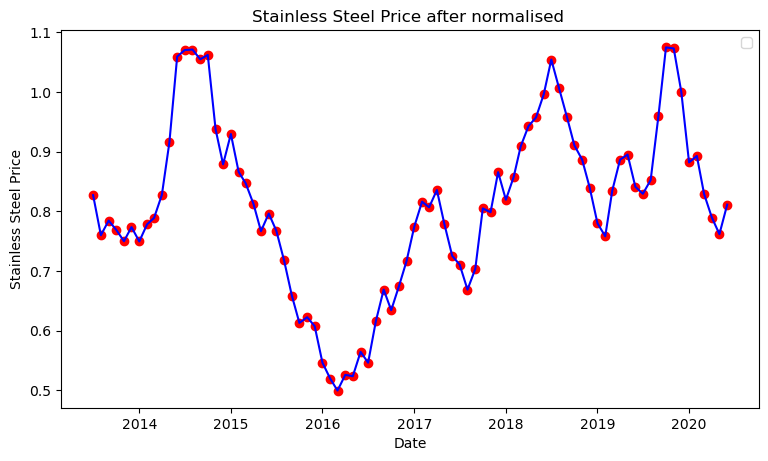

In [18]:
### plot population of each factor
### plot population of each factor
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Stainless Steel Price after normalised ')

plt.scatter(ssprice_std.index, ssprice_std['StainlessSteelPrice'], color="r")
plt.plot(ssprice_std.index, ssprice_std['StainlessSteelPrice'], color="b")
plt.xlabel('Date')
plt.ylabel('Stainless Steel Price')

plt.legend()
plt.show()

<AxesSubplot:>

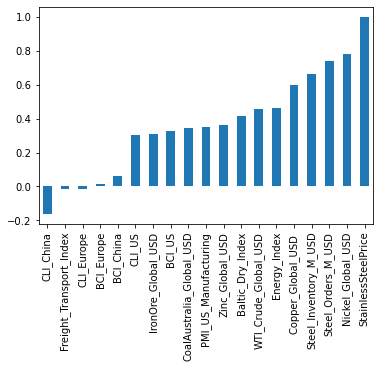

In [19]:
# Calculate correlation 
ssprice_std.corr()['StainlessSteelPrice']
# plot correlation：
corr = ssprice_std.corr()
corr = corr['StainlessSteelPrice']
corr[abs(corr)>-1].sort_values().plot.bar()

<AxesSubplot:>

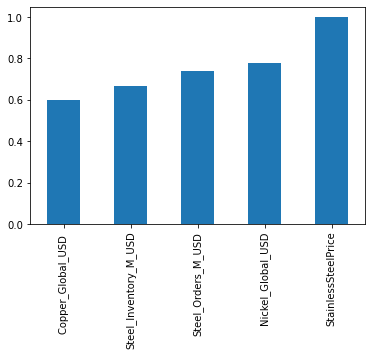

In [20]:
#Principal components analysis, There are to many Variable ,so PAC is necessary , in order to reduce the dimension of data. 
#If there are to much features ,it may lead to overfitting.
#So we choose only the feature with negative correlation and the feature, who hat correlation bigger than 0.5.
corr[abs(corr)>0.5].sort_values().plot.bar()

In [21]:
#Creating train and test dataset of normalized data
ssprice_std.rename(columns={'Copper_Global_USD':'Copper_Global_USD'})
ssprice_std_4features=ssprice_std[['StainlessSteelPrice','Copper_Global_USD ','Steel_Inventory_M_USD','Steel_Orders_M_USD','Nickel_Global_USD']]
ssprice_std_4features.columns.values.tolist()

['StainlessSteelPrice',
 'Copper_Global_USD ',
 'Steel_Inventory_M_USD',
 'Steel_Orders_M_USD',
 'Nickel_Global_USD']

#### Summary :
1. without missing value
2. In addition to stainless steel price and time, there are 18 Feutres, but it is not certain whether all of them have a significant impact
3. There are 84 rows of data
4. from 2013-07-01 to 2020-06-01 , monthly data
5. time series
6. Correlation :
    a) CLI_China has Negative correlation
    b) choose the following feature:
    Copper_Global_USD,Steel_Inventory_M_USD,Steel_Orders_M_USD,Nickel_Global_USD,BCI_China
   
7. Stainless Steel Price is normal distributed
                  


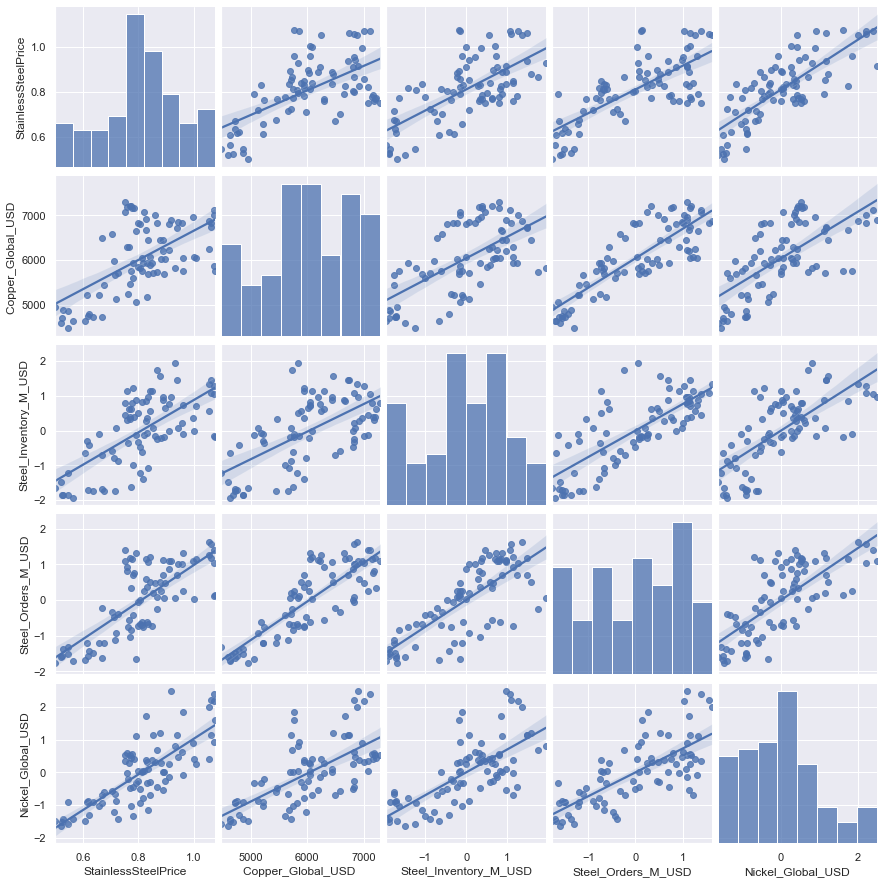

In [22]:
import seaborn as sns
sns.set() 
sns.pairplot(ssprice_std_4features,kind="reg")
#sns.pairplot(ssprice_std, x_vars=['Copper_Global_USD ','Steel_Inventory_M_USD','Steel_Orders_M_USD','Nickel_Global_USD'], y_vars='StainlessSteelPrice',kind="reg", height=5,aspect=0.7)
plt.show()

#sns.pairplot(ssprice_std)

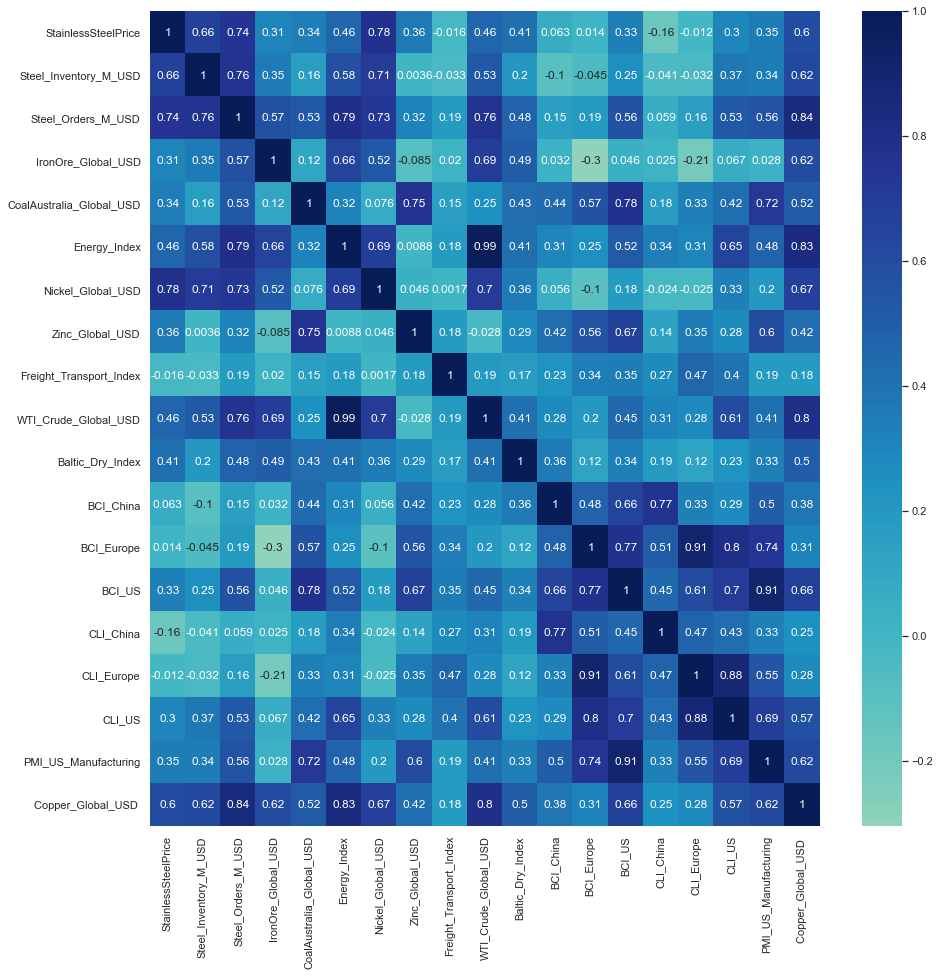

In [23]:
#Correlation coefficient matrix of normalized data
ssprice_std_corr = ssprice_std.corr()
import matplotlib.pyplot as mp
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(ssprice_std_corr, center=0, annot=True, cmap='YlGnBu')
mp.show()

#### Kendallstau( I've learned under Copula) :
The definition of Kendall’s tau that is used is:

tau = (P - Q) / sqrt((P + Q + T) * (P + Q + U))
where P is the number of concordant pairs, Q the number of discordant pairs, T the number of ties only in x, and U the number of ties only in y. If a tie occurs for the same pair in both x and y, it is not added to either T or U.

From:https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.kendalltau.html

#### Directional Symmetry(from wikipedia ):
Given a time series $t$ with values $t_{i}$ at times $i=1, \ldots, n$ and a model that makes predictions for those values $\hat{t}_{i}$, then the directional symmetry (DS) statistic is defined as
$$
\operatorname{DS}(t, \hat{t})=\frac{100}{n-1} \sum_{i=2}^{n} d_{i}
$$
$d_{i}=\left\{\begin{array}{ll}1, & \text { if }\left(t_{i}-t_{i-1}\right)\left(\hat{t}_{i}-\hat{t}_{i-1}\right)>0 \\ 0, & \text { otherwise }\end{array}\right.$

According to Wikipedia's definition of Directional Symmetry, I think Kenndallstau is more convincing. The former of Directional Symmetry in Wikipedia only considers the P which is mentioned above, while Kendallstau not only considers the data with the same direction of change, but also the data with opposite direction of change, thus the accuracy can be improved.

### Vector Autoregression model(VAR)

In [24]:
#load data again ,and named df
df= pd.read_csv('Stainless-Steel-Prices-Forecasty-Assignment.csv')
#df.dtypes #checke the type of each col df:stainless steel price
df['Date'] = pd.to_datetime(df['Date']) #Transfer to date
df['Steel_Inventory_M_USD']=df['Steel_Inventory_M_USD'].astype('float64')
df['Steel_Orders_M_USD']=df['Steel_Orders_M_USD'].astype('float64')
df['Baltic_Dry_Index']=df['Baltic_Dry_Index'].astype('float64')
data = df.drop(['Date'], axis=1)
data.index = df.Date
df=data
#df check data
#df.dtypes #checke the type of each col
df.index

DatetimeIndex(['2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01',
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
      

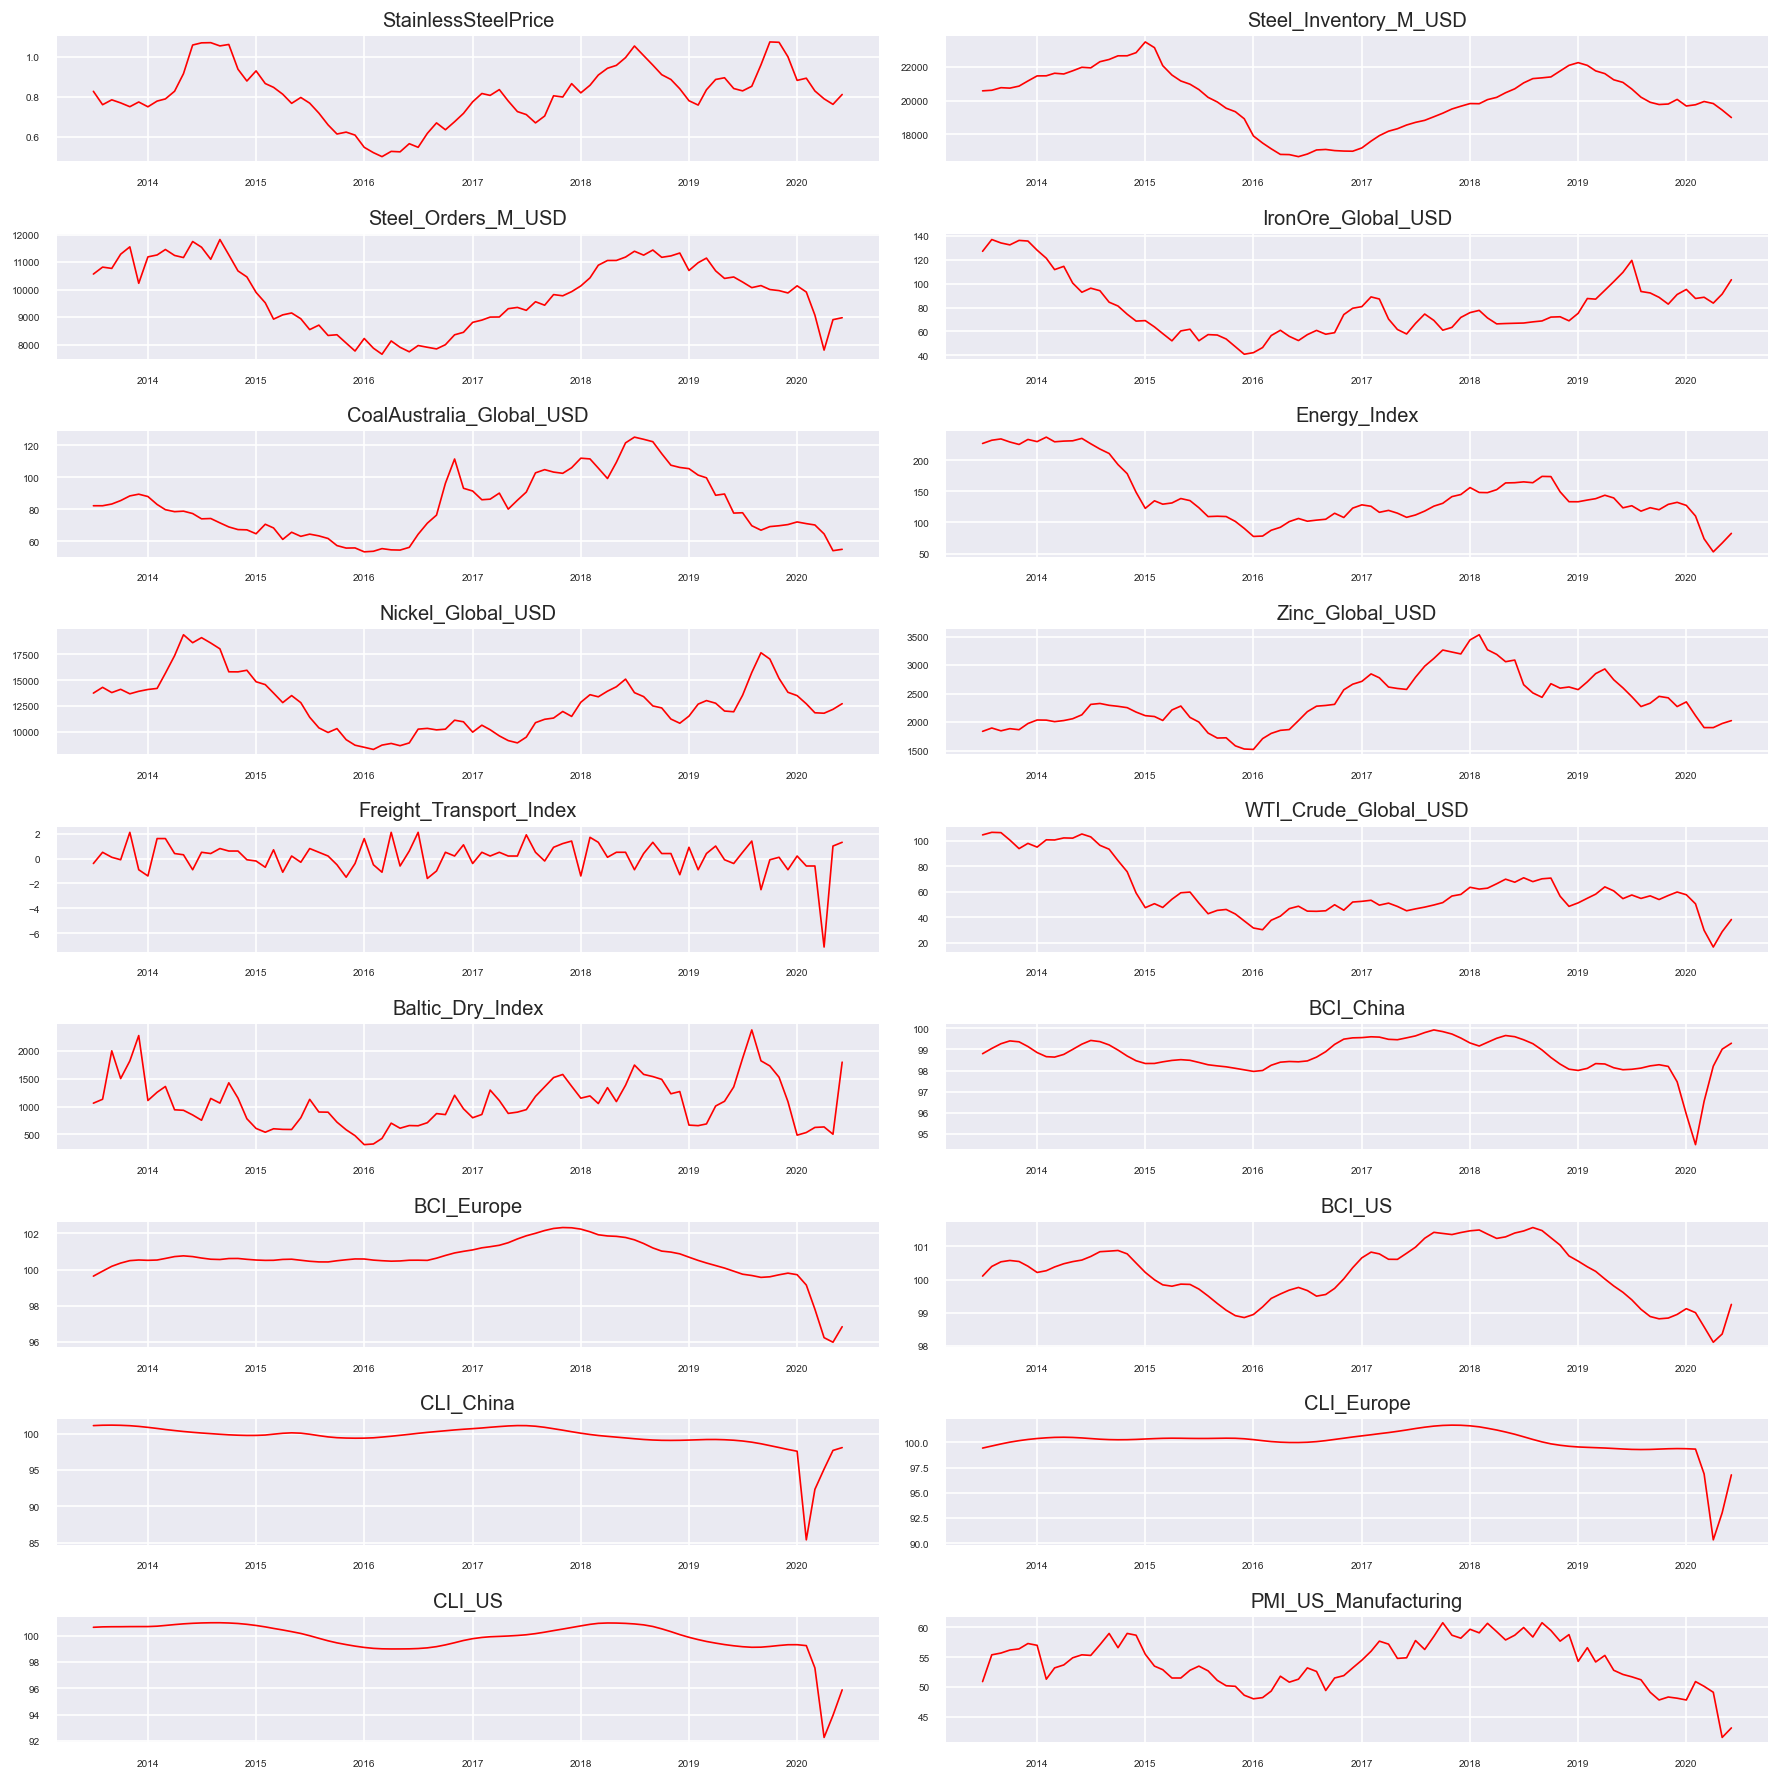

In [25]:
# Plot
fig, axes = plt.subplots(nrows=9, ncols=2, dpi=120, figsize=(15,15))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [26]:
# Calculate correlation 
#df.corr()['StainlessSteelPrice']
# plot correlation：
#corr = df.corr()
#corr = corr['StainlessSteelPrice']
#corr[abs(corr)>-1].sort_values().plot.bar()

In [27]:
#Testing Causation using Granger’s Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df1 = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df1.columns:
        for r in df1.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df1.loc[r, c] = min_p_value
    df1.columns = [var + '_x' for var in variables]
    df1.index = [var + '_y' for var in variables]
    return df1

grangers_causation_matrix(df, variables = df.columns)        

,StainlessSteelPrice_x,Steel_Inventory_M_USD_x,Steel_Orders_M_USD_x,IronOre_Global_USD_x,CoalAustralia_Global_USD_x,Energy_Index_x,Nickel_Global_USD_x,Zinc_Global_USD_x,Freight_Transport_Index_x,WTI_Crude_Global_USD_x,Baltic_Dry_Index_x,BCI_China_x,BCI_Europe_x,BCI_US_x,CLI_China_x,CLI_Europe_x,CLI_US_x,PMI_US_Manufacturing_x,Copper_Global_USD _x
StainlessSteelPrice_y,1.0000,0.1204,0.0001,0.0131,0.0520,0.0183,0.0000,0.0001,0.4200,0.0032,0.0324,0.0139,0.1156,0.1097,0.1056,0.5341,0.2803,0.1909,0.0000
Steel_Inventory_M_USD_y,0.0000,1.0000,0.0000,0.0101,0.0000,0.0000,0.0004,0.0000,0.0002,0.0000,0.0003,0.0001,0.0001,0.0000,0.0995,0.0001,0.0000,0.0000,0.0000
Steel_Orders_M_USD_y,0.0000,0.0079,1.0000,0.0313,0.0016,0.0000,0.0000,0.0054,0.0001,0.0000,0.0152,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0006,0.0000
IronOre_Global_USD_y,0.0391,0.0802,0.2258,1.0000,0.0196,0.2834,0.0179,0.0267,0.0292,0.2697,0.0109,0.0093,0.1046,0.0003,0.0965,0.0000,0.0039,0.0005,0.4108
CoalAustralia_Global_USD_y,0.0367,0.0041,0.0368,0.0060,1.0000,0.1839,0.2175,0.0033,0.0003,0.2017,0.5499,0.0195,0.0001,0.0000,0.0952,0.0039,0.0219,0.0065,0.0316
Energy_Index_y,0.0000,0.0250,0.0699,0.2774,0.0703,1.0000,0.0000,0.2087,0.0396,0.0057,0.1240,0.0000,0.0053,0.0025,0.0000,0.0449,0.0638,0.0039,0.0558
Nickel_Global_USD_y,0.0274,0.0225,0.0000,0.0016,0.0548,0.0071,1.0000,0.1179,0.4878,0.0067,0.0800,0.2350,0.0407,0.3486,0.1977,0.7652,0.1509,0.1722,0.0083
Zinc_Global_USD_y,0.0003,0.0001,0.0000,0.3818,0.2035,0.0116,0.0002,1.0000,0.1058,0.0379,0.4791,0.0004,0.1751,0.0047,0.0177,0.4257,0.0000,0.0171,0.0011
Freight_Transport_Index_y,0.0497,0.0026,0.0015,0.0054,0.1265,0.0001,0.0407,0.0092,1.0000,0.0001,0.0193,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0166,0.0213
WTI_Crude_Global_USD_y,0.0000,0.0713,0.2111,0.1844,0.1559,0.0001,0.0000,0.1195,0.0696,1.0000,0.0961,0.0000,0.0324,0.0060,0.0000,0.0135,0.0021,0.0027,0.0690


if p-value  < significance level (0.05) ,the Null Hypothesis would be reject.
Then, the corresponding X series (column) causes the Y (row).

##### Resul:So the following variables can cause StainlessSteelPrice_y ,
1. Steel_Orders_M_USD_x
2. IronOre_Global_USD_x
3. Energy_Index_x	
4. Nickel_Global_USD_x	
5. Zinc_Global_USD_x	
6. WTI_Crude_Global_USD_x
7. Baltic_Dry_Index_x
8. BCI_China_x
9. Copper_Global_USD _x

In [28]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [29]:
#Cointegration Test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,1)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


In [30]:
df_test1=df.iloc[:,0:10]
cointegration_test(df_test1)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
StainlessSteelPrice ::  339.29    > 219.4051  =>   True
Steel_Inventory_M_USD ::  233.87    > 179.5199  =>   True
Steel_Orders_M_USD ::  170.74    > 143.6691  =>   True
IronOre_Global_USD ::  118.9     > 111.7797  =>   True
CoalAustralia_Global_USD ::  82.1      > 83.9383   =>   False
Energy_Index ::  49.62     > 60.0627   =>   False
Nickel_Global_USD ::  30.28     > 40.1749   =>   False
Zinc_Global_USD ::  14.0      > 24.2761   =>   False
Freight_Transport_Index ::  3.33      > 12.3212   =>   False
WTI_Crude_Global_USD ::  0.99      > 4.1296    =>   False


In [31]:
df_test2=df.iloc[:,10:19]
cointegration_test(df_test2)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Baltic_Dry_Index ::  577.23    > 179.5199  =>   True
BCI_China ::  296.49    > 143.6691  =>   True
BCI_Europe ::  169.85    > 111.7797  =>   True
BCI_US ::  68.35     > 83.9383   =>   False
CLI_China ::  42.57     > 60.0627   =>   False
CLI_Europe ::  24.47     > 40.1749   =>   False
CLI_US ::  9.56      > 24.2761   =>   False
PMI_US_Manufacturing ::  1.13      > 12.3212   =>   False
Copper_Global_USD  ::  0.05      > 4.1296    =>   False


##### Result :
with True(also siginificant) :There is a cointegration relationship between variables
1. StainlessSteelPrice ::  339.29    > 219.4051  =>   True
2. Steel_Inventory_M_USD ::  233.87    > 179.5199  =>   True
3. Steel_Orders_M_USD ::  170.74    > 143.6691  =>   True
4. IronOre_Global_USD ::  118.9     > 111.7797  =>   True
5. Baltic_Dry_Index ::  577.23    > 179.5199  =>   True
6. BCI_China ::  296.49    > 143.6691  =>   True
7. BCI_Europe ::  169.85    > 111.7797  =>   True

In [32]:
#Creating train and test dataset
df_select=df[['StainlessSteelPrice','Steel_Inventory_M_USD',
                  'Steel_Orders_M_USD','IronOre_Global_USD',
                  'Baltic_Dry_Index','BCI_China','BCI_Europe']]
df_train=df.iloc[0:67, :]
df_test =df.iloc[67:84, :]
print ('Train set:', df_train.shape)
print ('Test set:', df_test.shape)


Train set: (67, 19)
Test set: (17, 19)


In [33]:
df_select

,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe
Date,,,,,,,
2013-07-01,0.827352,20575.0,10568.0,127.191304,1062.0,98.80018,99.64265
2013-08-01,0.760221,20609.0,10821.0,137.055000,1132.0,99.04874,99.91766
2013-09-01,0.784715,20761.0,10774.0,134.185714,2003.0,99.27196,100.18490
2013-10-01,0.769293,20735.0,11291.0,132.572727,1504.0,99.40488,100.36330
2013-11-01,0.750242,20854.0,11559.0,136.323810,1821.0,99.36221,100.49830
...,...,...,...,...,...,...,...
2020-02-01,0.893123,19753.0,9914.0,87.625000,535.0,94.50153,99.15099
2020-03-01,0.829167,19945.0,9072.0,88.659091,626.0,96.55129,97.81904
2020-04-01,0.789704,19824.0,7800.0,83.750000,635.0,98.21212,96.24888


In [34]:
#Check for Stationarity and Make the Time Series Stationary
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [35]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "StainlessSteelPrice" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4001
 No. Lags Chosen       = 3
 Critical value 1%     = -3.539
 Critical value 5%     = -2.909
 Critical value 10%    = -2.592
 => P-Value = 0.1417. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Steel_Inventory_M_USD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1556
 No. Lags Chosen       = 7
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.2227. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Steel_Orders_M_USD" 
    ------------------------------------

#### Result:
1. All sequences are Stationary.
2. No. Lags Chosen can be 0-11

In [36]:
df_train.index

DatetimeIndex(['2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01',
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
      

In [37]:
# Select the Order (P) of VAR model
model = VAR(df_train,dates=pd.date_range('2013-07-01','2019-01-01',freq='M'))
#with maxlags 4 , there is a erroe that 4 is to large ,so i try with 3.
#with 3 still show the same error, so i try with 2
x = model.select_order(maxlags=2)
x.summary()

,AIC,BIC,FPE,HQIC
0,63.49,64.13,3.748e+27,63.74
1,28.10,40.81,2.354e+12,33.11
2,4.624*,29.41*,3509.*,14.40*


##### Result: hier lags=0 would be choose
Although AIC is the smallest when LAGS is 2, the other three indicators are the smallest when LAGS is 0, and the difference between AIC and LAG is very small when LAGS is 2.So i choose 0 as lags.

In [38]:

#Train the VAR Model of Selected Order(p)
results=model.fit(maxlags=2,ic='aic')
results.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 01, Jul, 2021
Time:                     18:10:23
--------------------------------------------------------------------
No. of Equations:         19.0000    BIC:                    29.4115
Nobs:                     65.0000    HQIC:                   14.4040
Log likelihood:          -1161.65    FPE:                    3509.14
AIC:                      4.62353    Det(Omega_mle):        0.464431
--------------------------------------------------------------------
Results for equation StainlessSteelPrice
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                              -8.594755         8.015624           -1.072           0.284
L1.StainlessSteelPrice              0.066857         0.181098            0.369       

In [39]:
nobs=results.nobs
# Get the lag order
lag_order = results.k_ar

In [40]:
print( df_train.values[-lag_order:][:, 0])  
 

[0.84005307 0.78017888]


In [41]:
# Input data for forecasting
forecast_input = df_train.values[-lag_order:]
# Forecast
fc = results.forecast(y=forecast_input, steps=84)
df_forecast = pd.DataFrame(fc, index=df.index[-84:], columns=df.columns + '_2d')
df_forecast

,StainlessSteelPrice_2d,Steel_Inventory_M_USD_2d,Steel_Orders_M_USD_2d,IronOre_Global_USD_2d,CoalAustralia_Global_USD_2d,Energy_Index_2d,Nickel_Global_USD_2d,Zinc_Global_USD_2d,Freight_Transport_Index_2d,WTI_Crude_Global_USD_2d,Baltic_Dry_Index_2d,BCI_China_2d,BCI_Europe_2d,BCI_US_2d,CLI_China_2d,CLI_Europe_2d,CLI_US_2d,PMI_US_Manufacturing_2d,Copper_Global_USD _2d
Date,,,,,,,,,,,,,,,,,,,
2013-07-01,0.715549,22175.289848,10994.285549,68.561848,106.702133,119.991415,11505.276809,2596.570910,1.011967,40.461599,597.881219,98.059859,100.623202,100.656182,99.183943,99.526650,99.709620,52.195896,5652.437785
2013-08-01,0.738813,21653.074412,10431.975105,61.379620,97.853575,117.181275,11648.957143,2746.965116,1.432856,38.860960,979.127267,98.084432,100.698535,100.715602,99.240719,99.540866,99.588535,54.172361,5561.676154
2013-09-01,0.736436,21512.980021,9836.147067,52.650689,91.446808,108.367740,12380.552548,2852.751347,0.860809,35.739102,859.162458,98.138461,100.817425,100.744527,99.327455,99.592416,99.499794,54.185152,5768.886805
2013-10-01,0.762214,21592.468800,10228.451122,48.316838,92.343977,101.682229,12766.145769,3042.487069,-0.323448,32.893572,443.419283,98.192156,100.906383,100.802835,99.426426,99.687866,99.466084,54.276763,5880.936984
2013-11-01,0.784512,21628.426659,9581.293032,51.752218,91.248071,97.093460,13365.471128,3274.113096,0.561574,32.201808,483.364931,98.276877,100.943479,100.932764,99.544427,99.826389,99.500747,53.750442,5850.064315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,0.884463,18144.645664,7744.752588,-18.663493,128.571851,41.119678,-555.559133,3921.311311,-0.028196,20.477284,3164.925984,102.790817,108.588775,102.385604,101.778284,110.438934,104.362363,71.727878,9547.251687
2020-03-01,0.747360,17117.944423,9086.624108,-11.025720,130.302198,87.785182,-2032.633726,2794.627375,-0.100239,45.953132,3443.973083,101.791906,108.118962,101.763276,99.954952,109.434251,103.883480,69.761545,8914.834627
2020-04-01,0.610878,16152.309399,10516.270621,-0.621466,131.715155,136.673567,-3017.520146,1644.443855,-0.155599,71.994361,3633.591770,100.637133,107.350096,101.097541,98.028011,107.998586,103.221278,67.226102,8118.645595


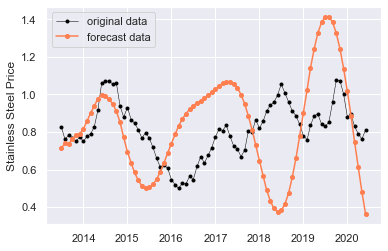

In [42]:
price_pre=df_forecast[['StainlessSteelPrice_2d']]
price=df[['StainlessSteelPrice']]
### plot population of each factor

fig, ax = plt.subplots() 

ax.plot(price, marker='.', linestyle='-', linewidth = 0.5, label='original data', color='black') 
ax.plot(price_pre, marker='o', markersize=4, linestyle='-', label='forecast data', color='coral') 
ax.set_ylabel("Stainless Steel Price") 
ax.legend()

#### Result:

As it shows, the foecast data is not so good. So i try with less feature not all features

### try with less features,forecast again: df_select

In [43]:

df_select_train=df_select.iloc[0:67, :]
df_select_test =df_select.iloc[67:84, :]
# ADF Test on each column
for name, column in df_select_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "StainlessSteelPrice" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4001
 No. Lags Chosen       = 3
 Critical value 1%     = -3.539
 Critical value 5%     = -2.909
 Critical value 10%    = -2.592
 => P-Value = 0.1417. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Steel_Inventory_M_USD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1556
 No. Lags Chosen       = 7
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.2227. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Steel_Orders_M_USD" 
    ------------------------------------

#### Result:

max lags is 8

In [44]:
# Select the Order (P) of VAR model
model_select = VAR(df_select_train,dates=pd.date_range('2013-07-01','2019-01-01',freq='M'))
#with maxlags 8 , there is a erroe that 8 is to large ,so i try with 7.

y = model_select.select_order(maxlags=7)
y.summary()

,AIC,BIC,FPE,HQIC
0,34.54,34.79,1.006e+15,34.64
1,19.88,21.84,4.366e+08,20.65
2,18.68,22.34,1.397e+08,20.11
3,17.65,23.02,5.920e+07,19.75
4,17.39,24.47,6.590e+07,20.16
5,16.45,25.24,5.118e+07,19.89
6,13.66,24.17,1.128e+07,17.77
7,7.820*,20.04*,4.159e+05*,12.60*


In [45]:

#Train the VAR Model of Selected Order(p)
results_select=model_select.fit(maxlags=7,ic='aic')
results_select.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 01, Jul, 2021
Time:                     18:10:32
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    20.0367
Nobs:                     60.0000    HQIC:                   12.5985
Log likelihood:          -480.546    FPE:                    415948.
AIC:                      7.81972    Det(Omega_mle):         5975.15
--------------------------------------------------------------------
Results for equation StainlessSteelPrice
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                          -25.983978        19.341162           -1.343           0.179
L1.StainlessSteelPrice           0.246754         0.361042            0.683           0.494
L1

In [46]:
results_select.nobs

60

In [47]:
# Get the lag order
lag_order = results_select.k_ar
# Input data for forecasting
#forecast_input = df_select_train.values[-lag_order:]
# Forecast
fc_select = results_select.forecast(df_select_train.values[-lag_order:], steps=84)
df_forecast_select = pd.DataFrame(fc_select, index=df_select.index[-84:], columns=df_select.columns + '_2d')
df_forecast_select

,StainlessSteelPrice_2d,Steel_Inventory_M_USD_2d,Steel_Orders_M_USD_2d,IronOre_Global_USD_2d,Baltic_Dry_Index_2d,BCI_China_2d,BCI_Europe_2d
Date,,,,,,,
2013-07-01,0.877184,21574.221008,9895.332430,75.252053,98.348973,98.018433,100.316158
2013-08-01,1.037076,21275.418259,10314.943678,64.501008,-77.097959,98.347457,99.985443
2013-09-01,1.152460,21272.459216,10333.289740,77.175215,438.071130,98.841972,99.932075
2013-10-01,1.001026,21553.785920,10378.771864,79.939558,1570.606610,98.986202,99.969377
2013-11-01,0.881913,21529.261982,9993.029307,62.603358,1979.881335,98.547975,99.848000
...,...,...,...,...,...,...,...
2020-02-01,2.256405,-68061.321980,13759.732007,-3768.612813,-96238.602098,61.698185,83.241265
2020-03-01,5.814388,-45463.441330,266.990990,934.112169,-131742.383355,99.118102,87.908401
2020-04-01,3.060691,67689.437558,-1978.541973,5180.380323,9358.461257,142.766876,113.447971


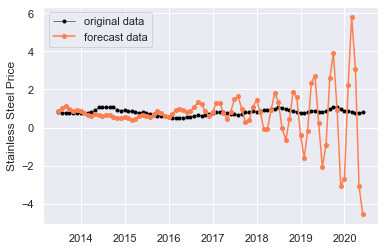

In [48]:
###plot
price_pre_select=df_forecast_select[['StainlessSteelPrice_2d']]
price_select=df_select[['StainlessSteelPrice']]
### plot population of each factor

fig, ax = plt.subplots() 

ax.plot(price_select, marker='.', linestyle='-', linewidth = 0.5, label='original data', color='black') 
ax.plot(price_pre_select, marker='o', markersize=4, linestyle='-', label='forecast data', color='coral') 
ax.set_ylabel("Stainless Steel Price") 
ax.legend()

In [51]:
"""
It is clear in the raw data visualization that the stainless steel price never reaches 0 in the raw data, 
so mape can be used.
"""
# mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_percentage_error
error1 = mean_absolute_percentage_error(df_test[['StainlessSteelPrice']],price_pre.iloc[67:84, :])
print("mean_absolute_percentage_error（MAPE）with all features：{:.2f}%".format(error1))

error2 = mean_absolute_percentage_error(df_select_test[['StainlessSteelPrice']],price_pre_select.iloc[67:84, :])
print("mean_absolute_percentage_error（MAPE） with select features：{:.2f}%".format(error2))


mean_absolute_percentage_error（MAPE）with all features：0.35%
mean_absolute_percentage_error（MAPE） with select features：2.88%


In [52]:
#Directional Symmetry
tau, p_value= stats.kendalltau(df_test[['StainlessSteelPrice']],price_pre.iloc[67:84, :])
tau_select, p_value_select = stats.kendalltau(df_select_test[['StainlessSteelPrice']],price_pre_select.iloc[67:84, :])
print('kendallstau of the data with all features:','tau=',tau,'P_value=', p_value)

print('kendallstau of the data with select features:','tau=',tau_select,'p_value=',p_value_select)


kendallstau of the data with all features: tau= 0.3235294117647059 P_value= 0.07616914862439772
kendallstau of the data with select features: tau= 0.24999999999999997 p_value= 0.17665741934030035


#### Summary :
According to the above data, selecting all features outperforms selecting some features, but the prediction results are still unsatisfactory.

# LSTMs

### Transform the time series into supervised learning, and then use the supervised learning algorithm to make predictions

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from pandas import concat
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [54]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Fram
    a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

"""
function source:https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
"""


'\nfunction source:https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/\n'

In [55]:
#load data again ,and named dfs
dfs= pd.read_csv('Stainless-Steel-Prices-Forecasty-Assignment.csv')
#df.dtypes #checke the type of each col df:stainless steel price
dfs['Date'] = pd.to_datetime(dfs['Date']) #Transfer to date
dfs['Steel_Inventory_M_USD']=dfs['Steel_Inventory_M_USD'].astype('float64')
dfs['Steel_Orders_M_USD']=dfs['Steel_Orders_M_USD'].astype('float64')
dfs['Baltic_Dry_Index']=dfs['Baltic_Dry_Index'].astype('float64')
data = dfs.drop(['Date'], axis=1)
data.index = dfs.Date
dfs=data
dfs.dtypes #checke the type of each col

StainlessSteelPrice         float64
Steel_Inventory_M_USD       float64
Steel_Orders_M_USD          float64
IronOre_Global_USD          float64
CoalAustralia_Global_USD    float64
Energy_Index                float64
Nickel_Global_USD           float64
Zinc_Global_USD             float64
Freight_Transport_Index     float64
WTI_Crude_Global_USD        float64
Baltic_Dry_Index            float64
BCI_China                   float64
BCI_Europe                  float64
BCI_US                      float64
CLI_China                   float64
CLI_Europe                  float64
CLI_US                      float64
PMI_US_Manufacturing        float64
Copper_Global_USD           float64
dtype: object

In [56]:
#df
#df.index
dfs.shape

(84, 19)

In [57]:
values = dfs.values
values

array([[8.27352483e-01, 2.05750000e+04, 1.05680000e+04, ...,
        1.00623000e+02, 5.09000000e+01, 6.90664000e+03],
       [7.60220812e-01, 2.06090000e+04, 1.08210000e+04, ...,
        1.00654500e+02, 5.54000000e+01, 7.18625000e+03],
       [7.84714800e-01, 2.07610000e+04, 1.07740000e+04, ...,
        1.00664600e+02, 5.57000000e+01, 7.15927000e+03],
       ...,
       [7.89704316e-01, 1.98240000e+04, 7.80000000e+03, ...,
        9.22802500e+01, 4.91000000e+01, 5.05797000e+03],
       [7.62035182e-01, 1.94410000e+04, 8.90800000e+03, ...,
        9.39509300e+01, 4.15000000e+01, 5.23983000e+03],
       [8.11476750e-01, 1.89980000e+04, 8.97900000e+03, ...,
        9.58824500e+01, 4.31000000e+01, 5.75460000e+03]])

In [58]:
# Integer labeling of wind direction characteristics
encoder = LabelEncoder()
values[:,0] = encoder.fit_transform(values[:,18])
# insure the type is float
values = values.astype('float64')

In [59]:
#Normalization of features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [60]:
# Constructed into a supervised learning problem
reframed = series_to_supervised(scaled, 1, 1)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t)
1,0.855422,0.573642,0.698922,0.897437,0.401823,0.944773,0.491041,0.157640,0.728261,0.977700,...,1.000000,0.395439,0.838638,0.619722,0.660797,0.999191,0.818001,0.963915,0.720207,0.962684
2,0.963855,0.578660,0.759521,1.000000,0.401810,0.973028,0.541294,0.186844,0.826087,1.000000,...,0.997409,0.818049,0.879806,0.661960,0.701152,1.000000,0.835863,0.965077,0.735751,0.953115
3,0.951807,0.601092,0.748263,0.970165,0.416805,0.984422,0.495641,0.162242,0.782609,0.997409,...,0.932628,0.575934,0.904320,0.690156,0.712905,0.998540,0.851628,0.965307,0.761658,0.968631
4,0.975904,0.597255,0.872096,0.953393,0.446777,0.957629,0.524126,0.181102,0.760870,0.932628,...,0.858100,0.729743,0.896450,0.711493,0.703918,0.995052,0.864694,0.966205,0.772021,0.921686
5,0.915663,0.614817,0.936287,0.992397,0.487522,0.936175,0.485069,0.171949,1.000000,0.858100,...,0.903675,0.950995,0.855317,0.717104,0.662842,0.989054,0.875103,0.966470,0.818653,0.972844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.506024,0.441411,0.596407,0.564973,0.260648,0.404706,0.469113,0.414375,0.793478,0.455849,...,0.376583,0.105774,0.000000,0.498549,0.257689,0.000000,0.790999,0.800497,0.487047,0.431240
80,0.277108,0.452332,0.542275,0.486027,0.245911,0.311981,0.397840,0.294591,0.706522,0.376583,...,0.145644,0.149927,0.378035,0.288033,0.134123,0.440190,0.574607,0.605850,0.445596,0.252100
81,0.168675,0.480667,0.340599,0.496780,0.234115,0.113389,0.319541,0.190437,0.706522,0.145644,...,0.000000,0.154294,0.684341,0.039867,0.000000,0.617203,0.000000,0.000000,0.393782,0.207889
82,0.144578,0.462810,0.035928,0.445735,0.156176,0.000000,0.315738,0.190309,0.000000,0.000000,...,0.133582,0.090733,0.832301,0.000000,0.071697,0.779479,0.235985,0.192303,0.000000,0.272386


In [61]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[20:39], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.855422   0.573642   0.698922   0.897437   0.401823   0.944773   
2   0.963855   0.578660   0.759521   1.000000   0.401810   0.973028   
3   0.951807   0.601092   0.748263   0.970165   0.416805   0.984422   
4   0.975904   0.597255   0.872096   0.953393   0.446777   0.957629   
5   0.915663   0.614817   0.936287   0.992397   0.487522   0.936175   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.491041   0.157640   0.728261    0.977700    0.361475    0.792796   
2   0.541294   0.186844   0.826087    1.000000    0.395439    0.838638   
3   0.495641   0.162242   0.782609    0.997409    0.818049    0.879806   
4   0.524126   0.181102   0.760870    0.932628    0.575934    0.904320   
5   0.485069   0.171949   1.000000    0.858100    0.729743    0.896450   

   var13(t-1)  var14(t-1)  var15(t-1)  var16(t-1)  var17(t-1)  var18(t-1)  \
1    0.576257    0.576745    0.995936    0.799993  

##### From the above output we see that var(t-1) to var19(t-1) are our feature variables for the previous month, var1(t) is the target variable at the current moment t, and var(t) is the result of a single data translation of var(t-1). This allows us to use the characteristic data at moment t-1 to predict the price of stainless steel at moment t.

   var1(t-1)  /var1(t)
   
1   0.855422   /0.963855  

2   0.963855   /0.951807 

3   0.951807   /0.975904  

4   0.975904   /0.915663

5   0.915663   /0.987952  

In [74]:
#Creating train and test dataset
values = reframed.values
n_train= 12*5 #3 years data ,monthly data,so totally is 60
train = values[:n_train, :]
test = values[n_train:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

#train_X= tf.transpose(train_X, [0, 2, 1])
#test_X= tf.transpose(test_X, [0, 2, 1])

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(60, 1, 19) (60,) (23, 1, 19) (23,)


Track training and test losses during training by setting the validation_data parameter in the fit() function. At the end of the run, the training and test loss trend lines are plotted.

### Construct an LSTM neural network model.

1. Add a layer of neural network by add to start with input training data.

2. The input_shape = (None,1) where None means that there is no limit to the amount of data in the input set of the model (i.e., it can be the price of stainless steel for any month in the past), and 1 here means that there is only one dimension of stainless steel price.

3. The units = 19 means that the input dimension is mapped into 19 dimensions. return_sequences is True, which means that multiple units are returned for a short period of time, and False, which means that only one unit is returned.

4. Then a layer of neural network with 1-dimensional output is added and the activation layer function is set to linear (the reason for choosing linear is that I have tried various activation functions here and found that linear activation functions work best)

5. The model is finally compiled and the prediction is clearly a regression problem, we choose the loss function as mse and the optimizer as rmsprop.



In [102]:
from keras.models import Sequential
from keras.layers import Bidirectional,LSTM
from keras.layers.core import Dense, Activation, Dropout
# design network
model = Sequential() 
"""
model.add(LSTM(input_shape=(67,19),units=19,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(67,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation("linear"))
model = Sequential()
"""
model.add(LSTM(19, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 19)                2964      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 20        
Total params: 2,984
Trainable params: 2,984
Non-trainable params: 0
_________________________________________________________________
None


In [103]:
len(model.layers) # get the layer

2

1. batch_size: the number of samples for each gradient update, 32 if not specified.

2. batch_size is actually the main role of using fewer samples to obtain the appropriate gradient direction of the optimized model and to avoid excessive memory usage during full-sample iterations.

3. epochs refers to the number of training model iterations, which can be interpreted as we traverse all the models once, then 1 epoch; (nb_epoch is used in keras version 1.*, same meaning)

4. validation_split represents the proportion of how much data in the dataset is used as the training data for the validation set, here 5% of the results are selected for validation.


Epoch 1/84
2/2 - 2s - loss: 0.6285 - val_loss: 0.5291
Epoch 2/84
2/2 - 0s - loss: 0.5966 - val_loss: 0.4997
Epoch 3/84
2/2 - 0s - loss: 0.5658 - val_loss: 0.4709
Epoch 4/84
2/2 - 0s - loss: 0.5363 - val_loss: 0.4427
Epoch 5/84
2/2 - 0s - loss: 0.5091 - val_loss: 0.4152
Epoch 6/84
2/2 - 0s - loss: 0.4836 - val_loss: 0.3884
Epoch 7/84
2/2 - 0s - loss: 0.4604 - val_loss: 0.3623
Epoch 8/84
2/2 - 0s - loss: 0.4386 - val_loss: 0.3367
Epoch 9/84
2/2 - 0s - loss: 0.4174 - val_loss: 0.3113
Epoch 10/84
2/2 - 0s - loss: 0.3977 - val_loss: 0.2864
Epoch 11/84
2/2 - 0s - loss: 0.3790 - val_loss: 0.2615
Epoch 12/84
2/2 - 0s - loss: 0.3607 - val_loss: 0.2378
Epoch 13/84
2/2 - 0s - loss: 0.3446 - val_loss: 0.2148
Epoch 14/84
2/2 - 0s - loss: 0.3310 - val_loss: 0.1935
Epoch 15/84
2/2 - 0s - loss: 0.3185 - val_loss: 0.1726
Epoch 16/84
2/2 - 0s - loss: 0.3075 - val_loss: 0.1533
Epoch 17/84
2/2 - 0s - loss: 0.2972 - val_loss: 0.1368
Epoch 18/84
2/2 - 0s - loss: 0.2875 - val_loss: 0.1202
Epoch 19/84
2/2 - 0

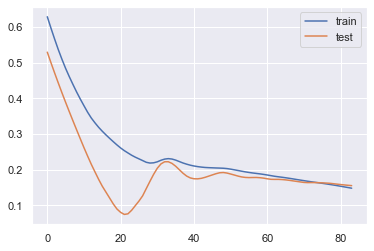

In [104]:
# fit model
#history=model.fit(train_X,train_y,batch_size=10,epochs=20,validation_split=0.05)

history = model.fit(train_X, train_y, epochs=84, batch_size=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)
   
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
                    

#### plot result : The two best results after several attempts
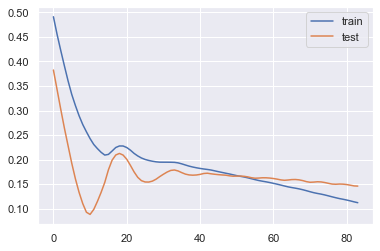
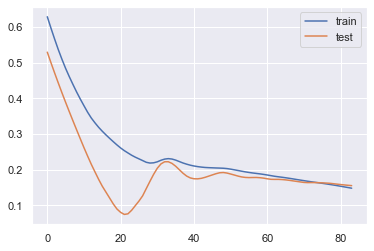

In [89]:
score2 = model.evaluate(test_X,test_y)
print(score2)
ac=1-score2 
print("Accuracy rate of approximately ：{:}".format(ac))

1/1 [==============================] - 0s 17ms/step - loss: 0.1406
0.14055581390857697
Accuracy rate of approximately ：0.859444186091423


Accuracy rate of approximately 85%

In [90]:
# make a prediction
yhat = model.predict(test_X)
yhat.shape


(23, 1)

In [91]:
from keras.layers import concatenate

In [92]:
test_x = test_X.reshape((test_X.shape[0], test_X.shape[2]))
#test_X[:, 1:]=np.float32(test_X[:, 1:])
test_x[:, 1:].shape

(23, 18)

In [93]:
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_x[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [95]:

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
from sklearn.metrics import mean_squared_error
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 13.663


### Model Evaluation


In [96]:
# calculate mape
error = mean_absolute_percentage_error(inv_y,inv_yhat)
print("mean_absolute_percentage_error（MAPE）：{:.2f}%".format(error1))

##Directional Symmetry
tau_select, p_value_select = stats.kendalltau(inv_y,inv_yhat)
print('kendallstau of the data:','tau=',tau,'P_value=', p_value)


mean_absolute_percentage_error（MAPE）：0.35%
kendallstau of the data: tau= 0.3235294117647059 P_value= 0.07616914862439772


#### Because the mape is very small and the p-value is very small, I consider the results predicted by the LSTM to be informative.

In [97]:
#dfs.index

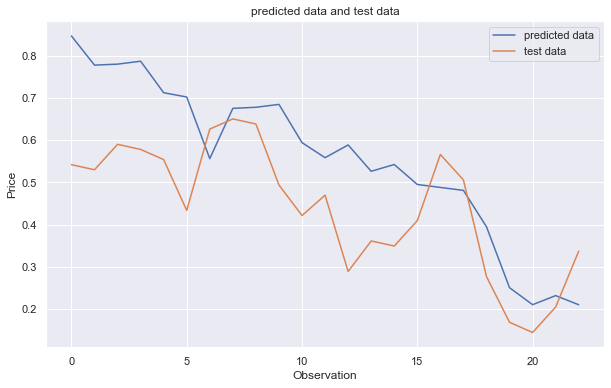

In [98]:
# Prediction
y_pred_test = model.predict(test_X)

plt.figure(figsize=(10, 6))

plt.plot(y_pred_test, label='predicted data')

plt.plot(test_y, label='test data')

plt.title("predicted data and test data")

plt.xlabel('Observation')

plt.ylabel('Price')

plt.legend()

plt.show();

In [99]:
predict=pd.DataFrame(y_pred_test)
time=dfs.iloc[61:84,].index
predict.index=time

In [100]:
predict.columns=['predict_StainlessSteelPrice']

In [101]:
predict

,predict_StainlessSteelPrice
Date,
2018-08-01,0.847149
2018-09-01,0.778042
2018-10-01,0.780372
2018-11-01,0.787330
2018-12-01,0.712689
2019-01-01,0.702488
2019-02-01,0.556491
2019-03-01,0.675635
2019-04-01,0.678169


# Another idea about the data is to use DeepAR 

#### Why choose: DeepAR can alleviate the data requirements to some extent. As a supervised learning algorithm, DeepAR supplements default values directly within the model. Instead of artificially scanning the data for default values and fussing over how to fill them during the import process, DeepAR models take care of this problem internally. With DeepAR, it is possible to correlate time series with multiple groupings, to deal with statistically intractable nonlinearities and scale problems, and to perform cold-start time series forecasting with little to no historical data, requiring only a similar sequence of events to support it.

#### There was still a statistical model used before using VAR, but it was later removed because the structure was just too unsatisfactory. There may have been some data not used later in the code initially because the model was removed after it was used in an unsatisfactory way.

#### Because I am short of time, besides this task, I have also a seminar on open AI's new paper from last year (GPT3_language model). I am very sorry that the final result does not contain three methods.